In [43]:
import numpy as np
import pandas as pd
import pyodbc as odbc 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
def get_imlist(path):
    return[os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [46]:
def getDataSet(sql):
    try:
        connection = odbc.connect("Driver={SQL Server};Server=EMIRDEV;Database=HDW_EMIR;Trusted_Connection=yes")
        df = pd.read_sql(sql, connection)
    except e:
        print(e)
    finally:
        connection.close()
    return df


In [49]:
sql = '''SELECT 
       [DurableKey]
      ,[PatientEpicId]
      ,[PostalCode]
      ,[CITY]
      ,[Zip6County]
      ,[Sex]
      ,[FirstRace]
      ,[PreferredLanguage]
      ,[Age]
      ,[HouseholdMedianIncome]
      ,[AgeGroup]
      ,[Insurance]
      ,[InsuranceType]
      ,[AdmitsCount]
      ,[LOS]
      ,[ERCount]
      ,[AnyMalignancyFlag]
      ,[CerebrovascularDiseaseFlag]
      ,[ChronicPulmonaryDiseaseFlag]
      ,[CongestiveHeartFailureFlag]
      ,[DementiaFlag]
      ,[DiabetesWithChronicComplicationFlag]
      ,[DiabetesWithoutChronicComplicationFlag]
      ,[MetastaticSolidTumorFlag]
      ,[ModerateOrSevereLiverDiseaseFlag]
      ,[PepticUlcerDiseaseFlag]
      ,[RenalDiseaseFlag]
      ,[PeripheralVascularDiseaseFlag]
      ,[RheumaticDiseaseFlag]
      ,[Obesity]
      ,[HTN]
      ,[Medications]
      ,[Charges2014]
      ,[Charges2015]
      ,[Charges2016]
      ,[Charges2017]
      ,[Visits]
      ,[NoShow]
      ,[SocialDeterminantRiskFlag]
      ,[MaritalStatus]
      ,[RACE-Ethnicity]
      ,[HighCost_10Percent_Actual]
     , CASE
	WHEN ISNULL(Visits,0) > 5
	THEN 1
	ELSE 0
END AS [EngagementVisits],
CASE
	WHEN PCPDepartment IN ('*Unspecified', 'HFHS EXTERNAL PROVIDERS')
	THEN 0
	ELSE 1
END AS [EngagementPCP],
 CASE
	WHEN Zip6County = 'Yes'
	THEN 1
	ELSE 0
END AS [EngagementZip],
[No of Diagnosis]


  FROM [ML].[PatientClustering_Phase3_Features2016]
  where Charges2017<>0 
  and Charges2016<>0 
  and Charges2013<>0 
  and Charges2014<>0 
  and Charges2015<>0 
  and Charges2017<900000 
  and AnyMalignancyFlag=0 AND MetastaticSolidTumorFlag=0 
  and
  RenalDiseaseFlag=0 
          '''

In [53]:
trainset = getDataSet(sql)

NameError: name 'e' is not defined

In [51]:
def cleanDataSet(df):
    file= df.drop(['PatientEpicId',
                'DurableKey',
                'AgeGroup',
                'InsuranceType',
                'Charges2017',
                   #'Charges2014',
                   #'Charges2015',
                   #'Charges2016',   
                'NoShow',
                'PostalCode',
                'Zip6County'
                ,'FirstRace',
                'PreferredLanguage',
                   #'HouseholdMedianIncome',
                   #'MaritalStatus',
                   #'RACE-Ethnicity',
                'CITY',
                'AnyMalignancyFlag',
                     'DiabetesWithChronicComplicationFlag',
                     'MetastaticSolidTumorFlag',
                     'PepticUlcerDiseaseFlag',
                   #'ModerateOrSevereLiverDiseaseFlag',
                  'RenalDiseaseFlag',
                   'CerebrovascularDiseaseFlag',
                   #'DementiaFlag',
                   #'PeripheralVascularDiseaseFlag',
                   #'RheumaticDiseaseFlag'
                   
                   
                  ], axis = 1)
    return file
    

In [168]:
file = cleanDataSet(trainset)

In [169]:
file = file[np.isfinite(file['Age'])]

In [170]:
def imputefeature(feature,df,method,missing_values):
    from sklearn.preprocessing import Imputer
    imputer = Imputer(missing_values=missing_values,strategy=method,axis=0)
    imputer = imputer.fit(df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1])
    df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1] = imputer.transform(df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1]);
    return df;

In [171]:
file = imputefeature('HouseholdMedianIncome',file,'mean','NaN')
file = imputefeature('SocialDeterminantRiskFlag',file,'most_frequent','NaN')

In [105]:
#nan_rows = file[file['HouseholdMedianIncome'].isnull()]
#nan_rows

In [106]:
#nan_rows = file[file['RACE-Ethnicity'].isnull()]
#nan_rows

In [172]:
file_1 = file.drop(['HighCost_10Percent_Actual'],axis =1)
file_cat = pd.get_dummies(file_1, prefix=[ 
    'Sex',
    'Insurance',
    #'CITY',
    'RACE-Ethnicity',
    #'AgeGroup',
    'MaritalStatus'
], columns=
                          [ 
                              'Sex',
                              'Insurance',
                              #'AgeGroup',
                              #'CITY'
                              'RACE-Ethnicity',
                              'MaritalStatus'
                          ])
#file_cat =file_1

In [108]:
def featureScale(feature,df):
    df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1] = sc_X.fit_transform(df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1])
    return df;

In [109]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
file_cat = featureScale('Charges2016',file_cat)
file_cat = featureScale('Charges2015',file_cat)
file_cat = featureScale('Charges2014',file_cat)
#file_cat = featureScale('Lacescore',file_cat)
#file_cat = featureScale('NoShow',file_cat)
#file_cat = featureScale('Visits',file_cat)
#file_cat = featureScale('ERCount',file_cat)
#file_cat = featureScale('AdmitsCount',file_cat)
#file_cat = featureScale('Medications',file_cat)
#file_cat = featureScale('Age',file_cat)
#file_cat = featureScale('LOS',file_cat)
#file_cat = featureScale('HouseholdMedianIncome',file_cat)

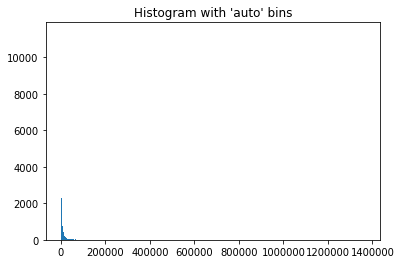

In [173]:
import matplotlib.pyplot as plt
a = np.hstack(file_cat['Charges2016'])            
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [110]:
X = file_cat.values
y = file['HighCost_10Percent_Actual']

In [111]:
#file_cat= file_cat.drop(['Insurance_Worker\'s Comp'],axis=1)

False    127356
True      12899
Name: HighCost_10Percent_Actual, dtype: int64

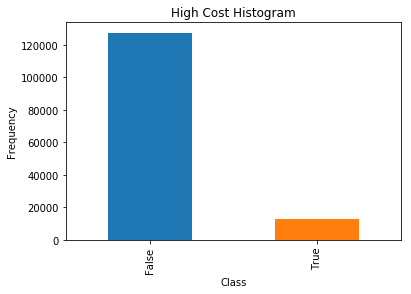

In [112]:
pd.value_counts(y).plot.bar()
plt.title('High Cost Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
y.value_counts()

In [113]:
import imblearn.over_sampling

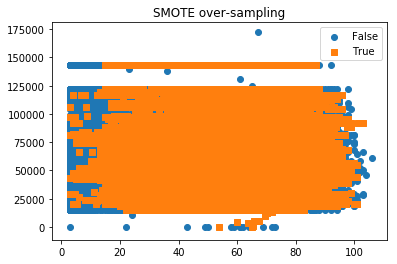

In [114]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)
plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')
X = X_sm
y = y_sm

In [115]:
X = pd.DataFrame(X)
y = pd.Series(y)

True     127356
False    127356
dtype: int64

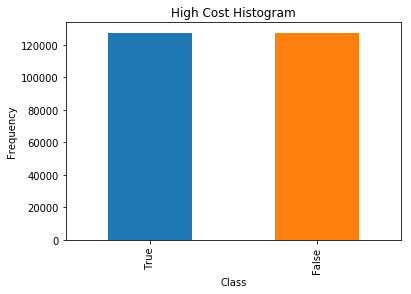

In [116]:
pd.value_counts(y).plot.bar()
plt.title('High Cost Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y)

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=100)
clf = LogisticRegression(class_weight='balanced')
clfmodelcross= clf.fit(X_train,y_train)
clfmodel= clf.fit(X,y)

Recall metric in the testing dataset: 69.47381632204825%
Precision metric in the testing dataset: 72.36629079444428%


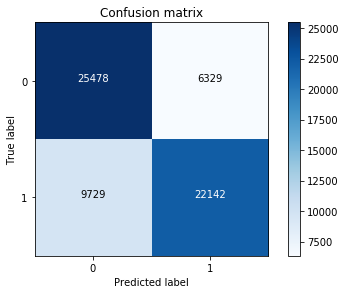

0.7478784034576333


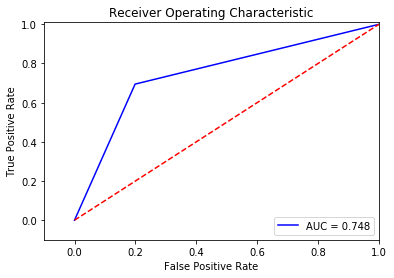

Sensitivity0.6947381632204825%
Specificity0.8010186436947841%
F Measure0.7441025421419347%
Positive Predictive Value0.7777036282533104%
Negative Predictive Value0.7441025421419347%


In [118]:
y_pre = clfmodelcross.predict(X_test)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pre)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()
from sklearn.metrics import roc_auc_score,roc_curve,auc,average_precision_score
fpr, tpr, thresholds = roc_curve(y_test, y_pre)
roc_auc = auc(fpr,tpr)
print(roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
tn= cnf_matrix[0,0]
fp = cnf_matrix[0,1]
fn = cnf_matrix[1,0]
tp = cnf_matrix[1,1]


st = tp/(tp+fn)
sp=tn/(tn+fp)
fm =2*st*sp/(st+sp)
ppv = tp/(tp+fp)
npv=tn/(fn+tn)



print("Sensitivity{}%".format(st))
print("Specificity{}%".format(sp))
print("F Measure{}%".format(fm))
print("Positive Predictive Value{}%".format(ppv))
print("Negative Predictive Value{}%".format(fm))

In [134]:
sql = '''SELECT [DurableKey]
      ,[PatientEpicId]
      ,[PostalCode]
      ,[CITY]
      ,[Zip6County]
      ,[Sex]
      ,[FirstRace]
      ,[PreferredLanguage]
      ,[Age]
      ,[HouseholdMedianIncome]
      ,[AgeGroup]
      ,[Insurance]
      ,[InsuranceType]
      ,[AdmitsCount]
      ,[LOS]
      ,[ERCount]
      ,[AnyMalignancyFlag]
      ,[CerebrovascularDiseaseFlag]
      ,[ChronicPulmonaryDiseaseFlag]
      ,[CongestiveHeartFailureFlag]
      ,[DementiaFlag]
      ,[DiabetesWithChronicComplicationFlag]
      ,[DiabetesWithoutChronicComplicationFlag]
      ,[MetastaticSolidTumorFlag]
      ,[ModerateOrSevereLiverDiseaseFlag]
      ,[PepticUlcerDiseaseFlag]
      ,[RenalDiseaseFlag]
      ,[PeripheralVascularDiseaseFlag]
      ,[RheumaticDiseaseFlag]
      ,[Obesity]
      ,[HTN]
      ,[Medications]
      ,[Charges2013]
      ,[Charges2014]
      ,[Charges2015]
      ,[Charges2016]
      ,[Charges2017]
      ,[Charges2018]
      ,[Visits]
      ,[NoShow]
      ,[SocialDeterminantRiskFlag]
      ,[MaritalStatus]
      ,[RACE-Ethnicity]
      ,[HighCost_10Percent_Actual]
      ,HighCost_10Percent_predicted
      , CASE
	WHEN ISNULL(Visits,0) > 5
	THEN 1
	ELSE 0
END AS [EngagementVisits],
CASE
	WHEN PCPDepartment IN ('*Unspecified', 'HFHS EXTERNAL PROVIDERS')
	THEN 0
	ELSE 1
END AS [EngagementPCP],
 CASE
	WHEN Zip6County = 'Yes'
	THEN 1
	ELSE 0
END AS [EngagementZip],
[No of Diagnosis]
  FROM [ML].[PatientClustering_Phase3_Features2017] 
  WHERE 
 Charges2018<>0 
  and Charges2016<>0 
  and Charges2013<>0 
  and Charges2014<>0 
  and Charges2015<>0 
  and Charges2018<900000 
  and AnyMalignancyFlag=0 AND MetastaticSolidTumorFlag=0 
  and RenalDiseaseFlag=0 
  '''


testset = getDataSet(sql)

file_test = cleanDataSet(testset)

file_test = file_test.drop(['Charges2018'],axis=1)

file_test = file_test[np.isfinite(file_test['Age'])]


def imputefeature(feature,df,method,missing_values):
    from sklearn.preprocessing import Imputer
    imputer = Imputer(missing_values=missing_values,strategy=method,axis=0)
    imputer = imputer.fit(df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1])
    df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1] = imputer.transform(df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1]);
    return df;



file_test = imputefeature('HouseholdMedianIncome',file_test,'mean','NaN')
file_test = imputefeature('SocialDeterminantRiskFlag',file_test,'most_frequent','NaN')


file_1_test = file_test.drop(['HighCost_10Percent_Actual'],axis =1)
file_cat_test = pd.get_dummies(file_1_test, prefix=[ 'Sex',
                                                    'Insurance',
                                                    #'CITY',
                                                    'RACE-Ethnicity',
                                                    'MaritalStatus'
                                                   ], columns=[ 'Sex',
                                                               'Insurance',
                                                               #'CITY'
                                                               'RACE-Ethnicity',
                                                               'MaritalStatus'
                                                              ])
#file_cat =file_1



def featureScale(feature,df):
    df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1] = sc_X.fit_transform(df.iloc[:,df.columns.get_loc(feature):df.columns.get_loc(feature)+1])
    return df;



from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
file_cat_test = featureScale('Charges2016',file_cat_test)
file_cat_test = featureScale('Charges2015',file_cat_test)
file_cat_test = featureScale('Charges2014',file_cat_test)
#file_cat_test = featureScale('Lacescore',file_cat_test)
#file_cat_test = featureScale('Visits',file_cat_test)
#file_cat_test = featureScale('ERCount',file_cat_test)
#file_cat_test = featureScale('AdmitsCount',file_cat_test)
#file_cat_test = featureScale('Medications',file_cat_test)
#file_cat_test = featureScale('Age',file_cat_test)
#file_cat_test = featureScale('LOS',file_cat_test)
#file_cat_test = featureScale('HouseholdMedianIncome',file_cat_test)

In [135]:
print(len(file_cat.columns))
print(len(file_cat_test.columns))

64
66


In [136]:
file_cat.columns

Index(['Age', 'HouseholdMedianIncome', 'AdmitsCount', 'LOS', 'ERCount',
       'ChronicPulmonaryDiseaseFlag', 'CongestiveHeartFailureFlag',
       'DementiaFlag', 'DiabetesWithoutChronicComplicationFlag',
       'ModerateOrSevereLiverDiseaseFlag', 'PeripheralVascularDiseaseFlag',
       'RheumaticDiseaseFlag', 'Obesity', 'HTN', 'Medications', 'Charges2014',
       'Charges2015', 'Charges2016', 'Visits', 'SocialDeterminantRiskFlag',
       'EngagementVisits', 'EngagementPCP', 'EngagementZip', 'No of Diagnosis',
       'Sex_Female', 'Sex_Male', 'Insurance_*UNKNOWN', 'Insurance_Blue Shield',
       'Insurance_Commercial', 'Insurance_HAP', 'Insurance_MEDICAID HMO',
       'Insurance_MEDICAID PENDING APPLICATIONS',
       'Insurance_MEDICARE ADVANTAGE', 'Insurance_Medicaid',
       'Insurance_Medicare', 'Insurance_Self-pay', 'Insurance_Tricare',
       'RACE-Ethnicity_African American-Hispanic',
       'RACE-Ethnicity_African American-Non Hispanic',
       'RACE-Ethnicity_African American-O

In [137]:
file_cat_test.columns

Index(['Age', 'HouseholdMedianIncome', 'AdmitsCount', 'LOS', 'ERCount',
       'ChronicPulmonaryDiseaseFlag', 'CongestiveHeartFailureFlag',
       'DementiaFlag', 'DiabetesWithoutChronicComplicationFlag',
       'ModerateOrSevereLiverDiseaseFlag', 'PeripheralVascularDiseaseFlag',
       'RheumaticDiseaseFlag', 'Obesity', 'HTN', 'Medications', 'Charges2013',
       'Charges2014', 'Charges2015', 'Charges2016', 'Visits',
       'SocialDeterminantRiskFlag', 'HighCost_10Percent_predicted',
       'EngagementVisits', 'EngagementPCP', 'EngagementZip', 'No of Diagnosis',
       'Sex_Female', 'Sex_Male', 'Insurance_*UNKNOWN', 'Insurance_Blue Shield',
       'Insurance_Commercial', 'Insurance_HAP', 'Insurance_MEDICAID HMO',
       'Insurance_MEDICAID PENDING APPLICATIONS',
       'Insurance_MEDICARE ADVANTAGE', 'Insurance_Medicaid',
       'Insurance_Medicare', 'Insurance_Self-pay', 'Insurance_Tricare',
       'RACE-Ethnicity_African American-Hispanic',
       'RACE-Ethnicity_African American-No

In [138]:
for column in file_cat_test:
    if(column not in file_cat.columns):
        file_cat_test= file_cat_test.drop([column],axis=1)

In [139]:
#file_cat_test['Charges2017'] = testset['Charges2017']
#file_cat_test = featureScale('Charges2017',file_cat_test)

In [140]:

feature_difference = set(file_cat) - set(file_cat_test)
feature_difference_df = None
if(len(list(feature_difference))>0):
    feature_difference_df = pd.DataFrame(data=np.zeros((file_cat_test.shape[0], len(feature_difference))),
                                     columns=list(feature_difference))


In [141]:
if feature_difference_df is not None:
    file_cat_test = file_cat_test.join(feature_difference_df)
    for column in file_cat_test.columns[file_cat_test.isna().any()].tolist():
        file_cat_test = imputefeature(column,file_cat_test,'most_frequent','NaN')
    

In [142]:
print(len(file_cat.columns))
print(len(file_cat_test.columns))

64
64


In [143]:
X_test = file_cat_test.values
y_test = file_test['HighCost_10Percent_Actual']

Recall metric in the testing dataset: 74.0530303030303%
Precision metric in the testing dataset: 96.49863693895433%


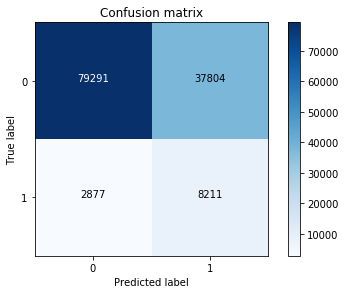

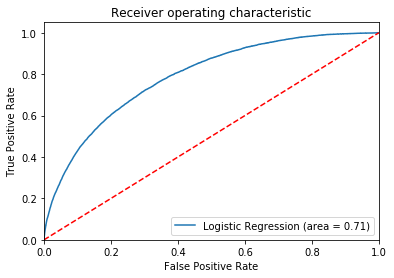

In [144]:
y_pre = clfmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pre)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()
from sklearn.metrics import roc_auc_score,roc_curve,auc,average_precision_score
logit_roc_auc = roc_auc_score(y_test, clfmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clfmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()




In [145]:
tn= cnf_matrix[0,0]
fp = cnf_matrix[0,1]
fn = cnf_matrix[1,0]
tp = cnf_matrix[1,1]


st = tp/(tp+fn)
sp=tn/(tn+fp)
fm =2*st*sp/(st+sp)
ppv = tp/(tp+fp)
npv=tn/(fn+tn)



print("Sensitivity{}%".format(st))
print("Specificity{}%".format(sp))
print("F Measure{}%".format(fm))
print("Positive Predictive Value{}%".format(ppv))
print("Negative Predictive Value{}%".format(fm))


Sensitivity0.740530303030303%
Specificity0.6771510312139716%
F Measure0.7074239410924793%
Positive Predictive Value0.17844181245246116%
Negative Predictive Value0.7074239410924793%


In [146]:
from sklearn.metrics import classification_report
target_names = ['Low Cost', 'high Cost']
print(classification_report(y_test, y_pre))

             precision    recall  f1-score   support

      False       0.96      0.68      0.80    117095
       True       0.18      0.74      0.29     11088

avg / total       0.90      0.68      0.75    128183



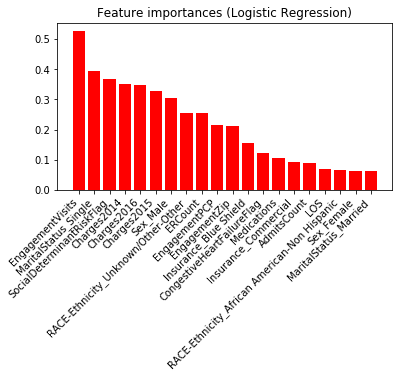

In [147]:
feature_importance = abs(clf.coef_[0])
coefs = np.abs(clf.coef_[0])
indices = np.argsort(coefs)[::-1]
plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(20), coefs[indices[:20]],
       color="r", align="center")
plt.xticks(range(20),file_cat_test.columns[indices[:20]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.show()

In [156]:
for i in range(len(X_test)):
    if(X_test.index[i]<1000000):
        updated = updated.append({'DurableKey':df['DurableKey'][X_test.index[i]],'Predicted_2018':y_pre[i],'Charges2018':df['Charges2018'][X_test.index[i]],'Actual':df['HighCost_10Percent_Actual'][X_test.index[i]]}, ignore_index=True)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [148]:
testset['HighCost_10Percent_Predicted'] = y_pre
#testset['HighCost_10Percent_Predicted']

In [40]:
#testset.to_csv("C:\PatientRiskStratification\LRNewData_Phase3.csv")